<a href="https://colab.research.google.com/github/KHN70/CN6005-Ai-Weekly-Portfolio/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df_diabetes = pd.read_csv('/content/diabetesN.csv')
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
X_diabetes = df_diabetes[['Glucose', 'BMI']]
X_diabetes.head()

,Glucose,BMI
0,148,33.6
1,85,26.6
2,183,23.3
3,89,28.1
4,137,43.1


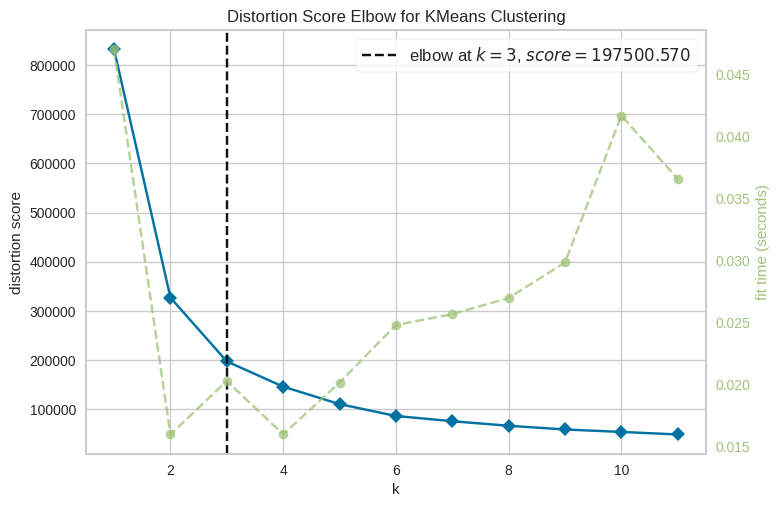

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(random_state=0, n_init=10)
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X_diabetes)
visualizer.show()

In [5]:
from sklearn.cluster import KMeans
kmeans_diabetes = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_diabetes.fit(X_diabetes)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [6]:
df_diabetes["Cluster"] = kmeans_diabetes.labels_
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,2


In [7]:
kmeans_diabetes.cluster_centers_

array([[ 92.01597444,  30.18658147],
       [171.03496503,  35.16713287],
       [126.88461538,  32.34935897]])

In [8]:
from collections import Counter
Counter(kmeans_diabetes.labels_)

Counter({np.int32(2): 312, np.int32(0): 313, np.int32(1): 143})

In [9]:
from sklearn import metrics
clustervalidation = metrics.silhouette_score(X_diabetes, kmeans_diabetes.labels_, metric='euclidean')
print(clustervalidation)

0.4586523405146536


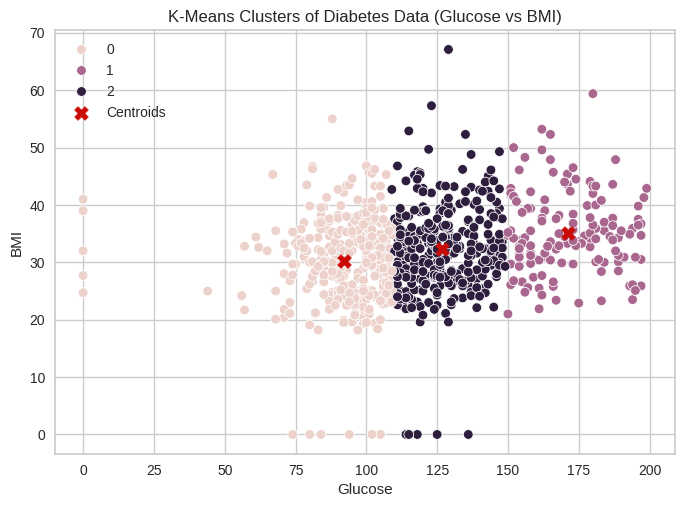

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=X_diabetes, x="Glucose", y="BMI", hue=kmeans_diabetes.labels_)
plt.scatter(kmeans_diabetes.cluster_centers_[:,0], kmeans_diabetes.cluster_centers_[:,1],
            marker="X", c="r", s=100, label="Centroids")
plt.title('K-Means Clusters of Diabetes Data (Glucose vs BMI)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

In [11]:
new_diabetes_data = [[100, 25], [180, 40], [130, 30]]
d_diabetes = pd.DataFrame(new_diabetes_data, columns=['Glucose', 'BMI'])
predicted_clusters_diabetes = kmeans_diabetes.predict(d_diabetes)
print("New Data Points:\n", d_diabetes)
print("\nPredicted Clusters:\n", predicted_clusters_diabetes)

New Data Points:
    Glucose  BMI
0      100   25
1      180   40
2      130   30

Predicted Clusters:
 [0 1 2]


## Summary:

### Q&A

*   **What are the insights from the identified clusters?**
    The K-Means clustering analysis identified three distinct groups within the `diabetesN.csv` dataset based on 'Glucose' and 'BMI' levels, suggesting potential different health profiles:
    *   **Cluster 0 (Low Glucose, Moderate BMI):** Centered around Glucose \~92.02 and BMI \~30.19, this cluster represents individuals with relatively lower glucose levels and moderate BMI.
    *   **Cluster 1 (High Glucose, High BMI):** Centered around Glucose \~171.04 and BMI \~35.17, this cluster represents individuals with notably higher glucose levels and higher BMI, potentially indicating a higher risk profile.
    *   **Cluster 2 (Moderate Glucose, Moderate BMI):** Centered around Glucose \~126.88 and BMI \~32.35, this cluster represents individuals with moderate glucose and BMI levels, falling between the other two clusters.

*   **What are the cluster characteristics?**
    The three clusters exhibit the following characteristics:
    *   **Cluster 0:** 313 data points, with a mean 'Glucose' of approximately 92.02 and a mean 'BMI' of approximately 30.19.
    *   **Cluster 1:** 143 data points, with a mean 'Glucose' of approximately 171.04 and a mean 'BMI' of approximately 35.17.
    *   **Cluster 2:** 312 data points, with a mean 'Glucose' of approximately 126.88 and a mean 'BMI' of approximately 32.35.

*   **What is the silhouette score and its interpretation?**
    The silhouette score for the clustering was approximately 0.459. A silhouette score ranges from -1 to 1, where higher values indicate that objects are well matched to their own cluster and poorly matched to neighboring clusters. A score of 0.459 suggests a reasonably good separation between the clusters, indicating that the clusters are fairly distinct but there is some overlap or ambiguity for some data points.

*   **What are the interpretations of the visualizations?**
    The scatter plot clearly visualizes the three clusters, with each cluster occupying a distinct region in the 'Glucose' vs. 'BMI' space. The centroids, marked with red 'X's, are positioned at the approximate center of each cluster, confirming that the algorithm effectively grouped data points based on their proximity. Cluster 1 is particularly noticeable as it occupies the upper-right region of the plot, corresponding to higher values for both features, while Cluster 0 is in the lower-left, and Cluster 2 is in the middle.

### Data Analysis Key Findings

*   The `diabetesN.csv` dataset, containing 768 entries and 9 columns, was successfully loaded and found to have no missing values.
*   'Glucose' and 'BMI' were selected as the features for K-Means clustering.
*   The `KElbowVisualizer` indicated that 3 is the optimal number of clusters for this dataset based on the 'Glucose' and 'BMI' features.
*   K-Means clustering with 3 clusters resulted in the following cluster centers (Glucose, BMI): Cluster 0 at (\~92.02, \~30.19), Cluster 1 at (\~171.04, \~35.17), and Cluster 2 at (\~126.88, \~32.35).
*   The clusters were distributed as follows: 313 data points in Cluster 0, 143 in Cluster 1, and 312 in Cluster 2.
*   The clustering achieved a silhouette score of approximately 0.459, indicating a moderate degree of separation between the clusters.
*   The generated scatter plot visually confirmed the formation of three distinct clusters, with centroids accurately representing their respective group centers.
*   The trained K-Means model successfully predicted clusters for new data points, demonstrating its applicability for unseen data.

### Insights or Next Steps

*   **Insight:** The clustering effectively segmented the diabetes dataset into three distinct groups based on 'Glucose' and 'BMI' levels, with one cluster (Cluster 1) clearly exhibiting characteristics (high glucose, high BMI) that could be associated with a higher risk of diabetes complications.
*   **Next Step:** Further analysis should involve examining the 'Outcome' variable (diabetes diagnosis) within each identified cluster to validate if these data-driven segments correlate with actual diabetes status, thereby providing clinical relevance to the clustering. This could help in identifying specific patient profiles for targeted interventions.
